<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_0_8)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.8_n20.csv',
 'data_multi_delta_-0.8_n30.csv',
 'data_multi_delta_-0.8_n60.csv',
 'data_multi_delta_-0.8_n120.csv',
 'data_multi_delta_-0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,61.740733,93.049514,0.119007,164.909255,164.751396,0.157858
1,0.0,1.0,54.857900,30.617895,0.140187,95.615982,95.523450,0.092532
2,0.0,2.0,47.217492,22.003818,0.036710,79.258020,79.284080,-0.026060
3,0.0,3.0,23.151206,55.666751,0.192945,89.010902,88.847279,0.163623
4,0.0,4.0,28.613679,31.649130,0.160236,70.423046,70.321558,0.101488
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,27.349005,97.909890,-0.280074,134.978821,135.356775,-0.377955
119996,999.0,116.0,52.169945,55.557280,-0.336086,117.391140,117.732303,-0.341163
119997,999.0,117.0,72.065951,36.780123,-0.261843,118.584232,118.801138,-0.216906
119998,999.0,118.0,21.581528,48.805398,-0.051903,80.335022,80.411667,-0.076644


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,61.740733,93.049514,0.119007,164.909255,164.751396,0.157858
1,0.0,1.0,54.857900,30.617895,0.140187,95.615982,95.523450,0.092532
2,0.0,2.0,47.217492,22.003818,0.036710,79.258020,79.284080,-0.026060
3,0.0,3.0,23.151206,55.666751,0.192945,89.010902,88.847279,0.163623
4,0.0,4.0,28.613679,31.649130,0.160236,70.423046,70.321558,0.101488
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,27.349005,97.909890,-0.280074,134.978821,135.356775,-0.377955
119996,999.0,116.0,52.169945,55.557280,-0.336086,117.391140,117.732303,-0.341163
119997,999.0,117.0,72.065951,36.780123,-0.261843,118.584232,118.801138,-0.216906
119998,999.0,118.0,21.581528,48.805398,-0.051903,80.335022,80.411667,-0.076644


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    61.740733  93.049514  0.119007  164.909255  164.751396  0.157858
      1.0    54.857900  30.617895  0.140187   95.615982   95.523450  0.092532
      2.0    47.217492  22.003818  0.036710   79.258020   79.284080 -0.026060
      3.0    23.151206  55.666751  0.192945   89.010902   88.847279  0.163623
      4.0    28.613679  31.649130  0.160236   70.423046   70.321558  0.101488
...                ...        ...       ...         ...         ...       ...
999.0 115.0  27.349005  97.909890 -0.280074  134.978821  135.356775 -0.377955
      116.0  52.169945  55.557280 -0.336086  117.391140  117.732303 -0.341163
      117.0  72.065951  36.780123 -0.261843  118.584232  118.801138 -0.216906
      118.0  21.581528  48.805398 -0.051903   80.335022   80.411667 -0.076644
      119.0  51.738796  47.837171 -0.017290  109.558677  109.569071 -0.010394

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    61.740733  93.049514  0.119007  164.909255  164.751396  0.157858
      1.0    54.857900  30.617895  0.140187   95.615982   95.523450  0.092532
      2.0    47.217492  22.003818  0.036710   79.258020   79.284080 -0.026060
      3.0    23.151206  55.666751  0.192945   89.010902   88.847279  0.163623
      4.0    28.613679  31.649130  0.160236   70.423046   70.321558  0.101488
...                ...        ...       ...         ...         ...       ...
999.0 115.0  27.349005  97.909890 -0.280074  134.978821  135.356775 -0.377955
      116.0  52.169945  55.557280 -0.336086  117.391140  117.732303 -0.341163
      117.0  72.065951  36.780123 -0.261843  118.584232  118.801138 -0.216906
      118.0  21.581528  48.805398 -0.051903   80.335022   80.411667 -0.076644
      119.0  51.738796  47.837171 -0.017290  109.558677  109.569071 -0.010394

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,61.740733,93.049514,0.119007,164.909255,164.751396,0.157858
1,0.0,1.0,54.857900,30.617895,0.140187,95.615982,95.523450,0.092532
2,0.0,2.0,47.217492,22.003818,0.036710,79.258020,79.284080,-0.026060
3,0.0,3.0,23.151206,55.666751,0.192945,89.010902,88.847279,0.163623
4,0.0,4.0,28.613679,31.649130,0.160236,70.423046,70.321558,0.101488
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,27.349005,97.909890,-0.280074,134.978821,135.356775,-0.377955
119996,999.0,116.0,52.169945,55.557280,-0.336086,117.391140,117.732303,-0.341163
119997,999.0,117.0,72.065951,36.780123,-0.261843,118.584232,118.801138,-0.216906
119998,999.0,118.0,21.581528,48.805398,-0.051903,80.335022,80.411667,-0.076644


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    61.740733  93.049514  0.119007  164.909255  164.751396  0.157858
      1.0    54.857900  30.617895  0.140187   95.615982   95.523450  0.092532
      2.0    47.217492  22.003818  0.036710   79.258020   79.284080 -0.026060
      3.0    23.151206  55.666751  0.192945   89.010902   88.847279  0.163623
      4.0    28.613679  31.649130  0.160236   70.423046   70.321558  0.101488
...                ...        ...       ...         ...         ...       ...
999.0 115.0  27.349005  97.909890 -0.280074  134.978821  135.356775 -0.377955
      116.0  52.169945  55.557280 -0.336086  117.391140  117.732303 -0.341163
      117.0  72.065951  36.780123 -0.261843  118.584232  118.801138 -0.216906
      118.0  21.581528  48.805398 -0.051903   80.335022   80.411667 -0.076644
      119.0  51.738796  47.837171 -0.017290  109.558677  109.569071 -0.010394

[120000 rows x 6 columns]

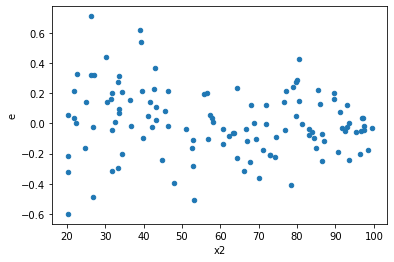

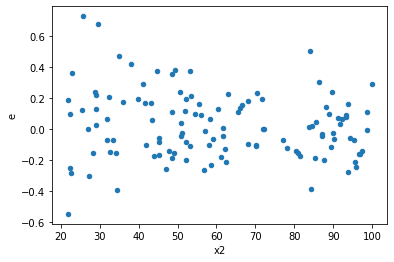

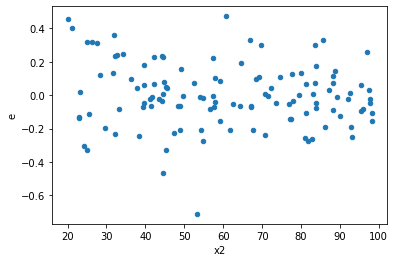

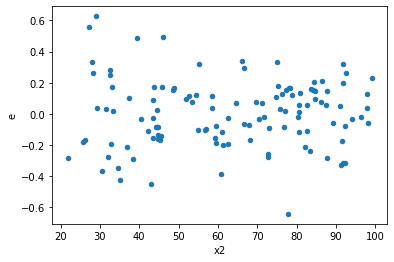

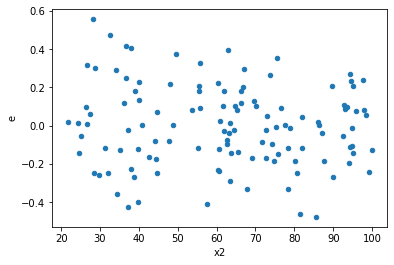

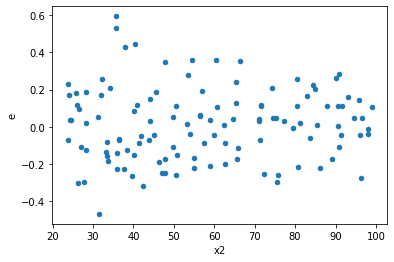

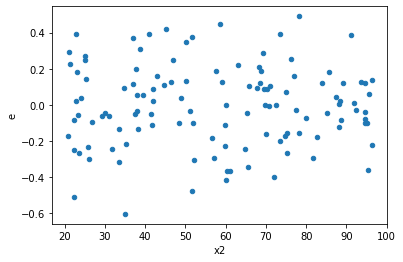

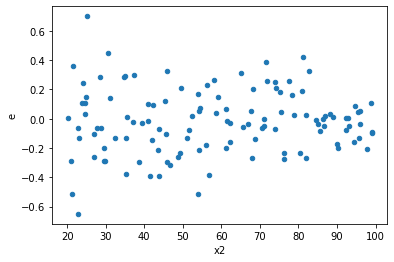

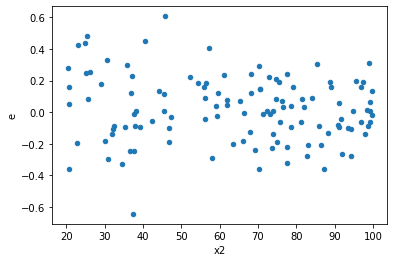

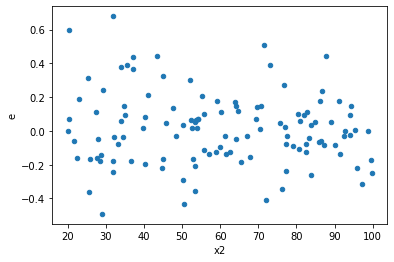

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,46.0,46.0,1.4625764098431384,1.6127024089158428,0.03179513934441605,0.03505874801990962,1.1026448929863468,0.741781077078425,0.6291094614607875,0.3708905385392125,Reject001=1 : Homoscedasticity
21.0,46.0,46.0,1.945477992800186,2.1690497045070884,0.0422929998434823,0.04715325444580627,1.1149186536852618,0.713763236832968,0.643118381583516,0.356881618416484,Reject001=1 : Homoscedasticity
38.0,46.0,46.0,1.3657282838338043,1.661247912809468,0.029689745300734875,0.03611408506107539,1.2163824477194658,0.5091630408068832,0.7454184795965584,0.2545815204034416,Reject001=1 : Homoscedasticity
40.0,46.0,46.0,1.331773131791125,1.5997406760888997,0.028951589821546195,0.0347769712193239,1.2012111056313175,0.5366385308763473,0.7316807345618264,0.26831926543817364,Reject001=1 : Homoscedasticity
69.0,46.0,46.0,1.657344102181715,1.7362875186374183,0.03602921961264598,0.03774538083994387,1.047632484015711,0.8752934876842438,0.5623532561578781,0.4376467438421219,Reject001=1 : Homoscedasticity
75.0,46.0,46.0,1.769099096408428,2.2500071034956894,0.038458676008878874,0.04891319790208021,1.271837800416939,0.41790477056868536,0.7910476147156573,0.20895238528434268,Reject001=1 : Homoscedasticity
89.0,46.0,46.0,1.8097695238144205,2.0696980237506972,0.0393428157350961,0.0449934352989282,1.143625194543242,0.6509304253399655,0.6745347873300173,0.32546521266998274,Reject001=1 : Homoscedasticity
140.0,46.0,46.0,1.9544162970714112,2.0274036721854354,0.04248731080590024,0.044073992873596424,1.0373448457339371,0.9015862333403177,0.5492068833298411,0.45079311667015887,Reject001=1 : Homoscedasticity
173.0,46.0,46.0,1.6731788688673461,1.7315879786716826,0.03637345367102927,0.03764321692764527,1.0349090649488517,0.9078669354479283,0.5460665322760359,0.45393346772396415,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,3.0261693951648336,0.7977771733738132,0.06578629119923551,0.017342982029865502,0.2636260794417157,1.3874926801916325e-05,Reject001=0 : Heteroscedasticity
1.0,46.0,46.0,2.727853648328694,1.222319056127259,0.059301166268015085,0.026572153394070847,0.44808820915893033,0.007525288010991998,Reject001=0 : Heteroscedasticity
2.0,46.0,46.0,1.4625764098431384,1.6127024089158428,0.03179513934441605,0.03505874801990962,1.1026448929863468,0.741781077078425,Reject001=1 : Homoscedasticity
3.0,46.0,46.0,2.506641918966571,1.4398095043546788,0.05449221562970807,0.03130020661640606,0.5743977603902348,0.06312979223730976,Reject001=1 : Homoscedasticity
4.0,46.0,46.0,2.1374185692935357,1.8188196515951824,0.0464656210715986,0.03953955764337353,0.8509421962195934,0.5863646713093672,Reject001=1 : Homoscedasticity
5.0,46.0,46.0,1.7859267580716283,1.4202714484875525,0.03882449474068757,0.030875466271468532,0.7952573878343726,0.44021390505970287,Reject001=1 : Homoscedasticity
6.0,46.0,46.0,2.367204785960986,2.024284896440285,0.05146097360784752,0.044006193400875755,0.8551372101161538,0.5978109172058718,Reject001=1 : Homoscedasticity
7.0,46.0,46.0,3.2917813348140754,1.2573815039339031,0.07156046380030599,0.02733438052030224,0.38197601117539653,0.0014389600861860535,Reject001=0 : Heteroscedasticity
8.0,46.0,46.0,2.9258657570709383,1.2785059910164107,0.06360577732762909,0.027793608500356753,0.43696672956599114,0.005884860429928405,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      808
Reject001=0 : Heteroscedasticity    192
Name: Result_test, dtype: int64